# 📊 Regresión Lineal Simple en CS:GO (Versión Local)

Este notebook muestra cómo aplicar un modelo de **regresión lineal simple** para predecir la `TravelledDistance` (distancia recorrida por un jugador en una ronda), utilizando como predictor el `RoundStartingEquipmentValue`.

Este archivo está preparado para ejecutarse de forma **local**, sin depender de Google Drive.

---

## 1. Carga y limpieza de datos

In [11]:
import pandas as pd
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Get the name of the uploaded file
# files.upload() returns a dictionary where keys are filenames
uploaded_filename = list(uploaded.keys())[0]

# Cargar el CSV al DataFrame (usando el nombre del archivo subido)
# Use the actual uploaded_filename instead of the hardcoded name
df = pd.read_csv(uploaded_filename, sep=';')

# Limpiar columnas: convertir valores numéricos escritos como string
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')

# Eliminar valores nulos
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue'])

# Ver las primeras filas
df[['RoundStartingEquipmentValue', 'TravelledDistance']].head()

Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022 (1).csv


<ipython-input-11-0fa6240777f3>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(uploaded_filename, sep=';')


,RoundStartingEquipmentValue,TravelledDistance
0,750,1.008314e+16
1,800,6.096088e+16
2,1000,5.642252e+15
3,850,8.963473e+15
4,1000,1.086565e+16


## 2. Entrenamiento del modelo

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir X e y
X = df[['RoundStartingEquipmentValue']]
y = df['TravelledDistance']

# Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo y entrenar
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 3. Evaluación del modelo

In [13]:

from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = model.predict(X_test)

# Métricas
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación (R^2):", r2_score(y_test, y_pred))


Error cuadrático medio (MSE): 1.665535215010874e+32
Coeficiente de determinación (R^2): 0.0001916774592763959


## 4. Visualización

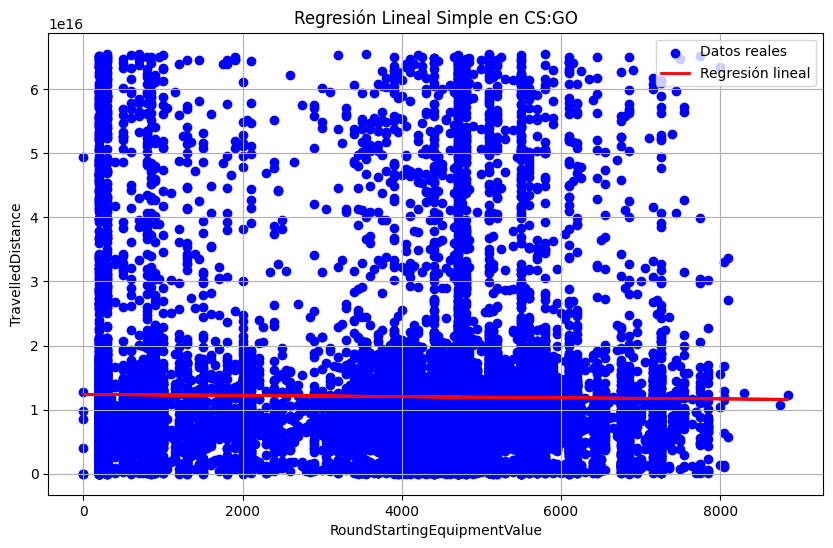

In [14]:

import matplotlib.pyplot as plt

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('RoundStartingEquipmentValue')
plt.ylabel('TravelledDistance')
plt.title('Regresión Lineal Simple en CS:GO')
plt.legend()
plt.grid(True)
plt.show()


# **Regresión multiple**


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Aplicar transformación logarítmica a la variable objetivo
df['LogTravelledDistance'] = np.log1p(df['TravelledDistance'])

# Eliminar valores infinitos o NaN resultantes de la transformación
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['LogTravelledDistance', 'RoundStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown'])

# Definir X e y
X_mult = df[['RoundStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown']]
y_mult = df['LogTravelledDistance']

# División entrenamiento/prueba
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mult, y_mult, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model_mult = LinearRegression()
model_mult.fit(X_train_m, y_train_m)

# Predicciones
y_pred_m = model_mult.predict(X_test_m)

# Evaluación
print("MSE (regresión múltiple - log):", mean_squared_error(y_test_m, y_pred_m))
print("R² (regresión múltiple - log):", r2_score(y_test_m, y_pred_m))

# Coeficientes
print("\nCoeficientes del modelo:")
for feature, coef in zip(X_mult.columns, model_mult.coef_):
    print(f"{feature}: {coef}")

MSE (regresión múltiple - log): 5.6434506513023575
R² (regresión múltiple - log): 0.0038125956811706496

Coeficientes del modelo:
RoundStartingEquipmentValue: 1.7003331103588974e-05
RLethalGrenadesThrown: 0.10522315531512952
RNonLethalGrenadesThrown: 0.09573615661036952


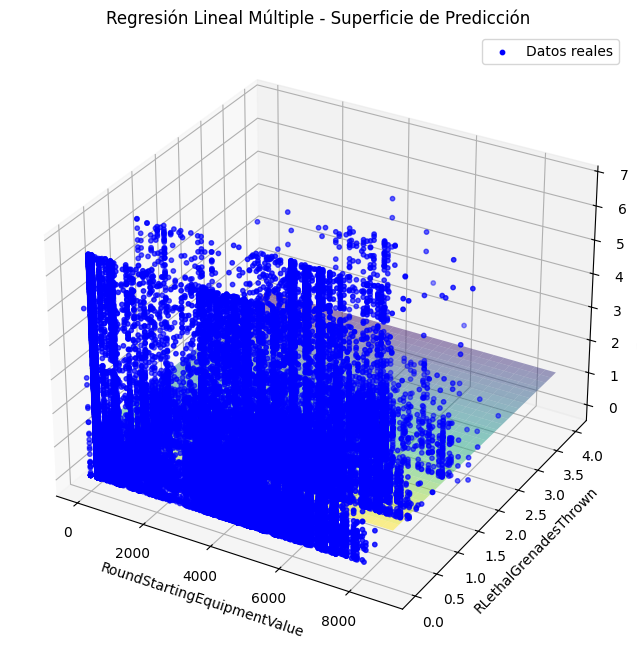

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Seleccionar solo dos variables para graficar
x1 = df['RoundStartingEquipmentValue']
x2 = df['RLethalGrenadesThrown']
y = df['TravelledDistance']

# Crear grid para superficie de predicción
x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30)
)

# Aplanar y combinar para hacer predicciones
X_grid = pd.DataFrame({
    'RoundStartingEquipmentValue': x1_grid.ravel(),
    'RLethalGrenadesThrown': x2_grid.ravel(),
    'RNonLethalGrenadesThrown': np.full_like(x1_grid.ravel(), df['RNonLethalGrenadesThrown'].mean())  # se fija en promedio
})

# Predicción sobre la grilla
y_pred_grid = model_mult.predict(X_grid)
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

# Graficar
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, cmap='viridis')
ax.scatter(x1, x2, y, color='blue', s=10, label='Datos reales')

ax.set_xlabel('RoundStartingEquipmentValue')
ax.set_ylabel('RLethalGrenadesThrown')
ax.set_zlabel('TravelledDistance')
ax.set_title('Regresión Lineal Múltiple - Superficie de Predicción')
plt.legend()
plt.show()

# **Decision Tree**
Predecir el número de bajas por jugador en una partida (MatchKills) a partir de tres variables:

RoundStartingEquipmentValue

RLethalGrenadesThrown

RNonLethalGrenadesThrown



In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables
# Usar el mismo df_filtrado para ambos
X_tree = df_filtrado[['RoundStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown']]
y_tree = df_filtrado['MatchKills'] #variable usada
# División entrenamiento/prueba
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

# Crear y entrenar modelo
tree_model = DecisionTreeRegressor(random_state=42)  # puedes probar sin max_depth también
tree_model.fit(X_train_t, y_train_t)

# Predicciones
y_pred_t = tree_model.predict(X_test_t)

# Evaluación
print("MSE (árbol de decisión):", mean_squared_error(y_test_t, y_pred_t))
print("R² (árbol de decisión):", r2_score(y_test_t, y_pred_t))

MSE (árbol de decisión): 38.17315301913644
R² (árbol de decisión): 0.024523764687693905


1. Decision Tree Regressor
Entrenaste un árbol de decisión con las variables anteriores.

Resultado:

MSE: 38.17

R²: 0.0245 (2.45%)

Conclusión: el modelo aprendió muy poco

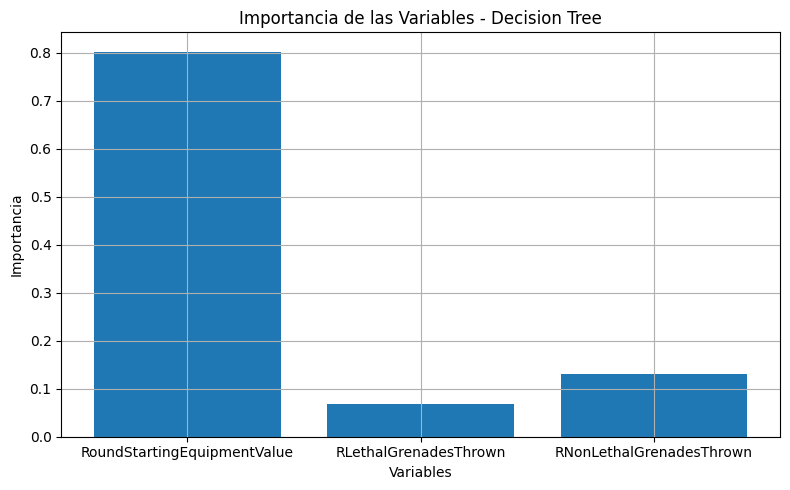

In [41]:
import matplotlib.pyplot as plt

# Obtener importancias
importancias = tree_model.feature_importances_
nombres = X_tree.columns

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres, importancias)
plt.title('Importancia de las Variables - Decision Tree')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Forest

In [47]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Filtrar outliers extremos en MatchKills (opcional, pero ayuda si hay valores muy altos)
limite = df['MatchKills'].quantile(0.99)
df_filtrado = df[df['MatchKills'] < limite].copy()

# 2. Variables predictoras
features = [
    'RoundStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'MatchAssists',
    'TravelledDistance'
]

X_rf = df_filtrado[features]
y_rf = df_filtrado['MatchKills']

# 3. División de datos
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# 4. Modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# 5. Evaluación
y_pred_rf = rf_model.predict(X_test_rf)
print("MSE (Random Forest - MatchKills):", mean_squared_error(y_test_rf, y_pred_rf))
print("R² (Random Forest - MatchKills):", r2_score(y_test_rf, y_pred_rf))



MSE (Random Forest - MatchKills): 28.304044235333173
R² (Random Forest - MatchKills): 0.18920455120864732


Conclusión del modelo Random Forest para MatchKills
El modelo Random Forest fue entrenado con cinco variables del jugador para predecir la cantidad de kills (MatchKills) en una partida. Los resultados obtenidos fueron:

Error cuadrático medio (MSE): 28.30

Coeficiente de determinación (R²): 0.189

Esto indica que el modelo es capaz de explicar aproximadamente el 18.9% de la variación en las kills de un jugador, lo cual representa una mejora significativa respecto a los intentos anteriores con otras variables como TravelledDistance.

## Support Vector Machine





In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar outliers en MatchKills
limite = df['MatchKills'].quantile(0.99)
df_filtrado = df[df['MatchKills'] < limite].copy()

# Definir variables predictoras
features = [
    'RoundStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'MatchAssists',
    'TravelledDistance'
]
X = df_filtrado[features]
y = df_filtrado['MatchKills']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo SVR con escalado
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10, epsilon=0.2))
svr_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = svr_model.predict(X_test)
print("MSE (SVR):", mean_squared_error(y_test, y_pred))
print("R² (SVR):", r2_score(y_test, y_pred))


MSE (SVR): 25.19788266083458
R² (SVR): 0.27818341397731616


Con un R² de 0.278, el SVR es capaz de explicar casi el 28% de la variabilidad en las kills de los jugadores.

La normalización previa fue clave para que el SVR funcione correctamente.